In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
import seaborn as sb

houseDf = pd.read_csv("kc_house_data.csv")

houseDf.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [2]:
houseDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [3]:
houseDf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
houseDf = houseDf.drop(['id','date', 'lat', 'long'], axis =1)

houseDf.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062


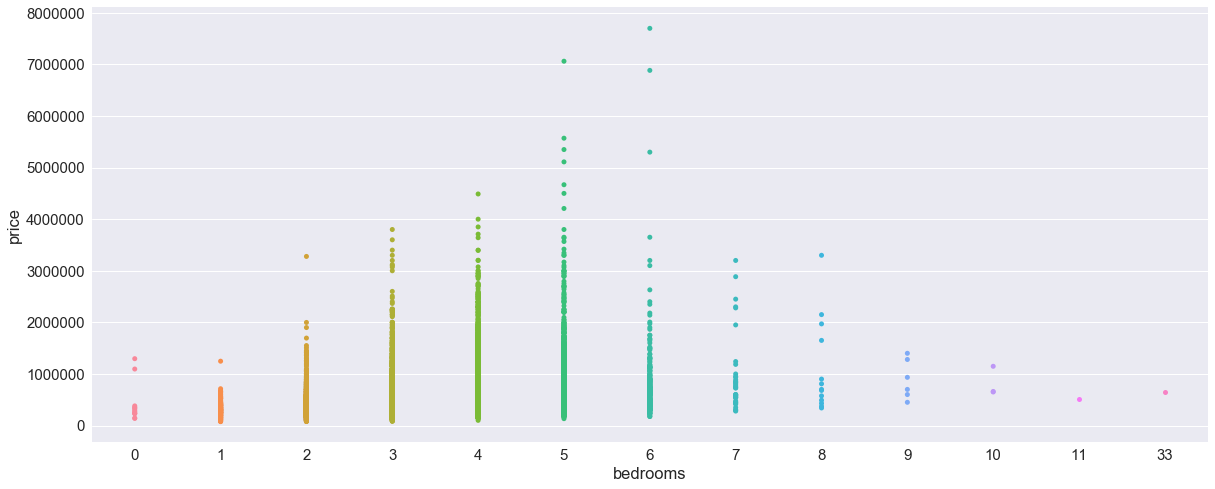

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 8))
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sb.stripplot(x="bedrooms", y="price", data=houseDf);

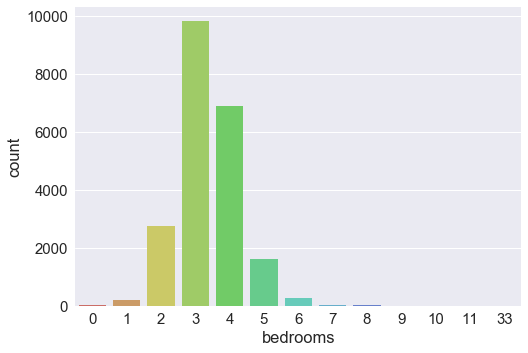

In [6]:
sb.countplot(x='bedrooms',data=houseDf, palette='hls')

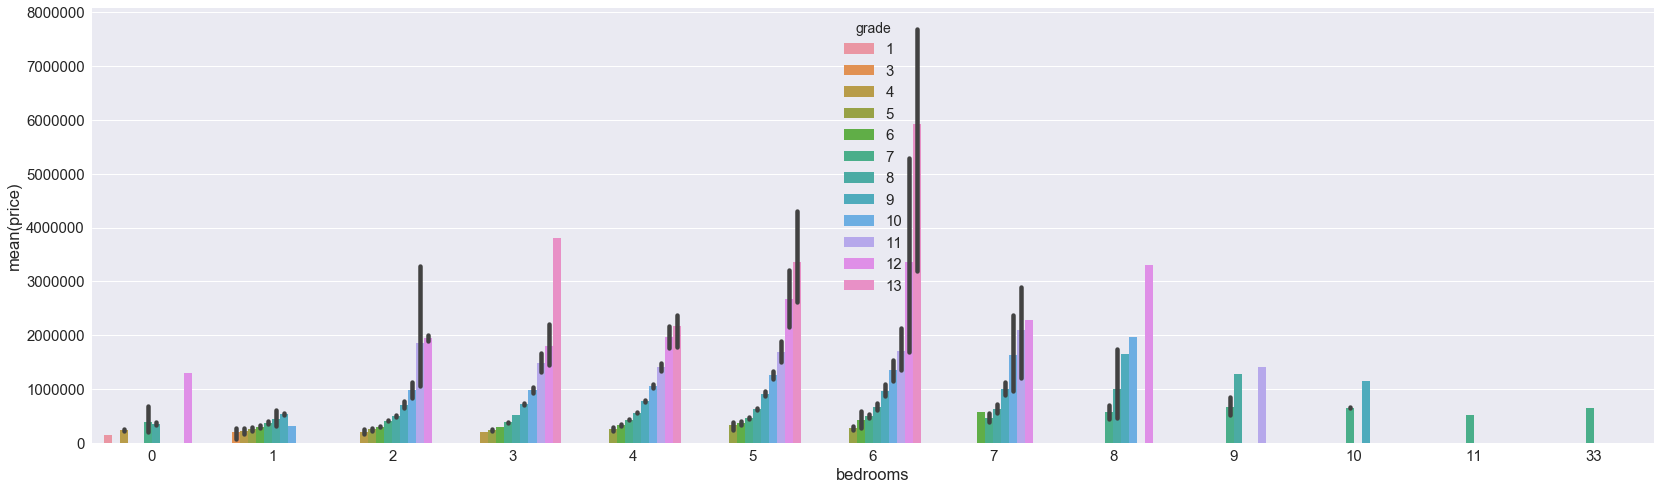

In [7]:
plt.figure(figsize=(28, 8))
sb.barplot(x="bedrooms", y="price", hue="grade", data=houseDf);

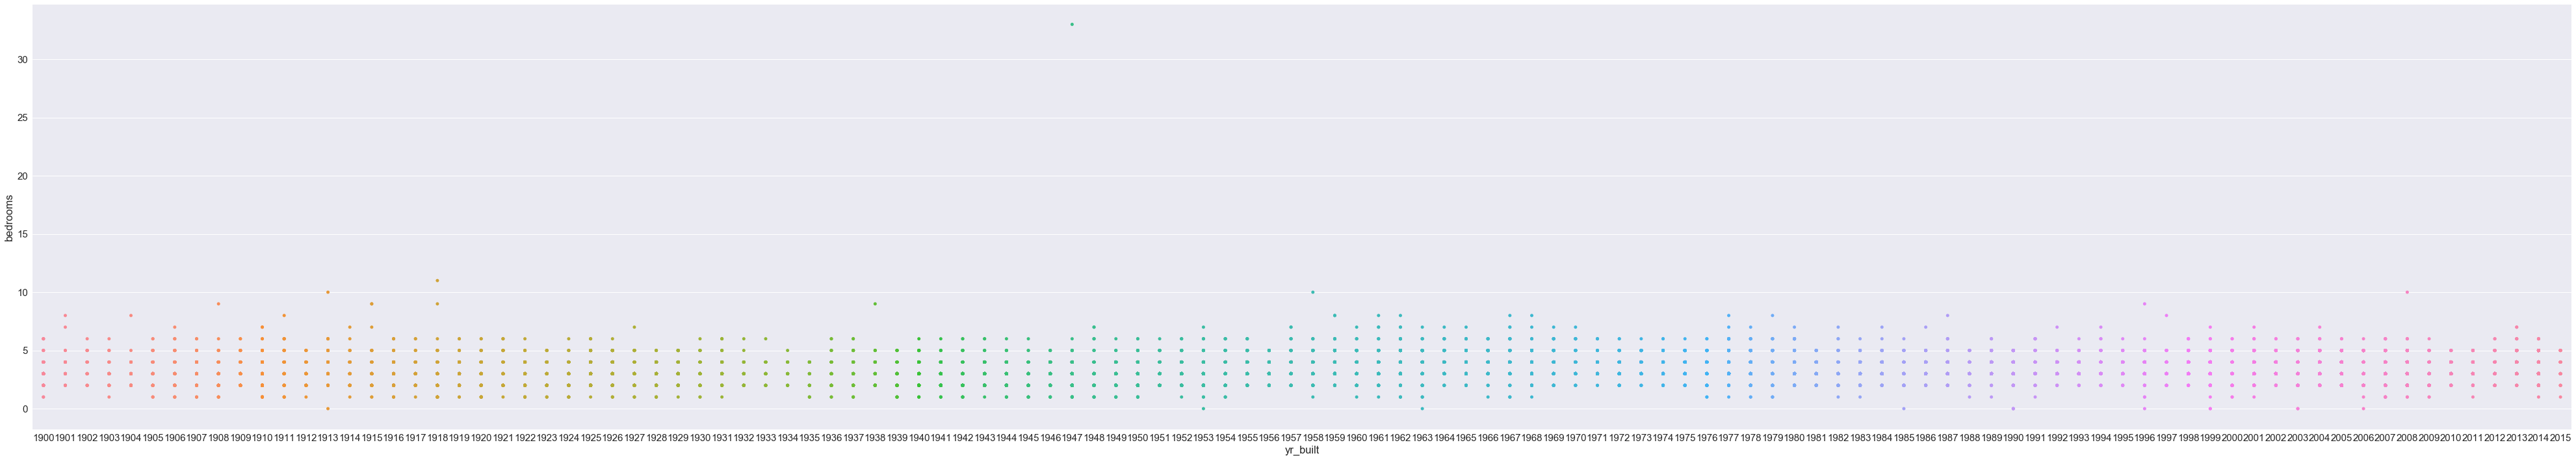

In [8]:
plt.figure(figsize=(70, 12))
sb.stripplot(x="yr_built", y="bedrooms", data=houseDf);

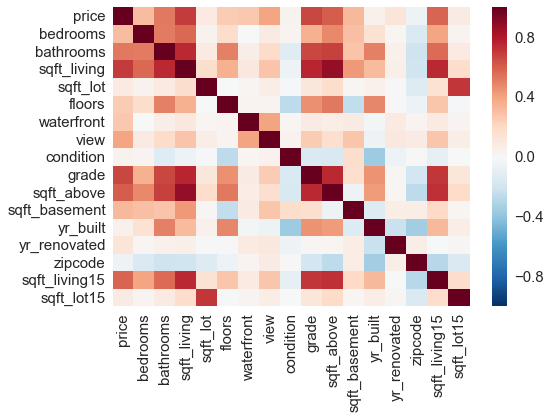

In [9]:
sb.heatmap(houseDf.corr())

In [25]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'sqft_living15', 'sqft_lot15']
targets = houseDf['price'].values
features = houseDf[list(columns)].values

In [26]:
features

array([[  3.00000000e+00,   1.00000000e+00,   1.18000000e+03, ...,
          0.00000000e+00,   1.34000000e+03,   5.65000000e+03],
       [  3.00000000e+00,   2.25000000e+00,   2.57000000e+03, ...,
          1.99100000e+03,   1.69000000e+03,   7.63900000e+03],
       [  2.00000000e+00,   1.00000000e+00,   7.70000000e+02, ...,
          0.00000000e+00,   2.72000000e+03,   8.06200000e+03],
       ..., 
       [  2.00000000e+00,   7.50000000e-01,   1.02000000e+03, ...,
          0.00000000e+00,   1.02000000e+03,   2.00700000e+03],
       [  3.00000000e+00,   2.50000000e+00,   1.60000000e+03, ...,
          0.00000000e+00,   1.41000000e+03,   1.28700000e+03],
       [  2.00000000e+00,   7.50000000e-01,   1.02000000e+03, ...,
          0.00000000e+00,   1.02000000e+03,   1.35700000e+03]])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.30)

In [28]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

regr.fit(X_train, y_train)

sco = regr.score(X_train, y_train)

print sco*100

51.3545295804


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

regr.fit(X_train, y_train)

sco = regr.score(X_train, y_train)

print sco*100

76.3941546544
